### Visualize cropgrids data
- Objective: this notebook clips global cropgrids data to India country boundaries to visualize the output

Import modules

In [1]:
# Import necessary libraries
import xarray as xr
import rioxarray
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set default DPI (for resolution)
plt.rcParams['figure.dpi'] = 300  # Increase resolution

Load data

In [3]:
# Load Climate data (.nc format)
cropgrids_data = xr.open_dataset(r"C:\Users\djava\OneDrive\Documents\Oxford\Projects\india_rice_early_warning\4_data\RAW_DATA\CROPGRIDS\CROPGRIDSv1.06_rice.nc")

In [4]:
# Load India shapefile & extract geometry
india_shapefile = gpd.read_file(r"C:\Users\djava\OneDrive\Documents\Oxford\Projects\india_rice_early_warning\4_data\RAW_DATA\SHAPEFILE\gadm36_IND_0.shp")
india_geometry = india_shapefile.geometry

Plot cropgrids data

In [5]:
# We first have to set the crs of the climate data and the resampled climate data
cropgrids_data.rio.write_crs("EPSG:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (lon: 7200, lat: 3600)
Coordinates:
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * lat          (lat) float32 -89.97 -89.93 -89.88 -89.82 ... 89.88 89.93 89.97
    spatial_ref  int32 0
Data variables:
    harvarea     (lat, lon) float32 ...
    cultarea     (lat, lon) float32 ...
    qual         (lat, lon) float32 ...
    set          (lat, lon) float32 ...
Attributes:
    Creation date:  02-Aug-2023 17:14:47
    Authors:        F. Maggi, F.H.M. Tang, T.H. Nguyen
    Version:        v1.06

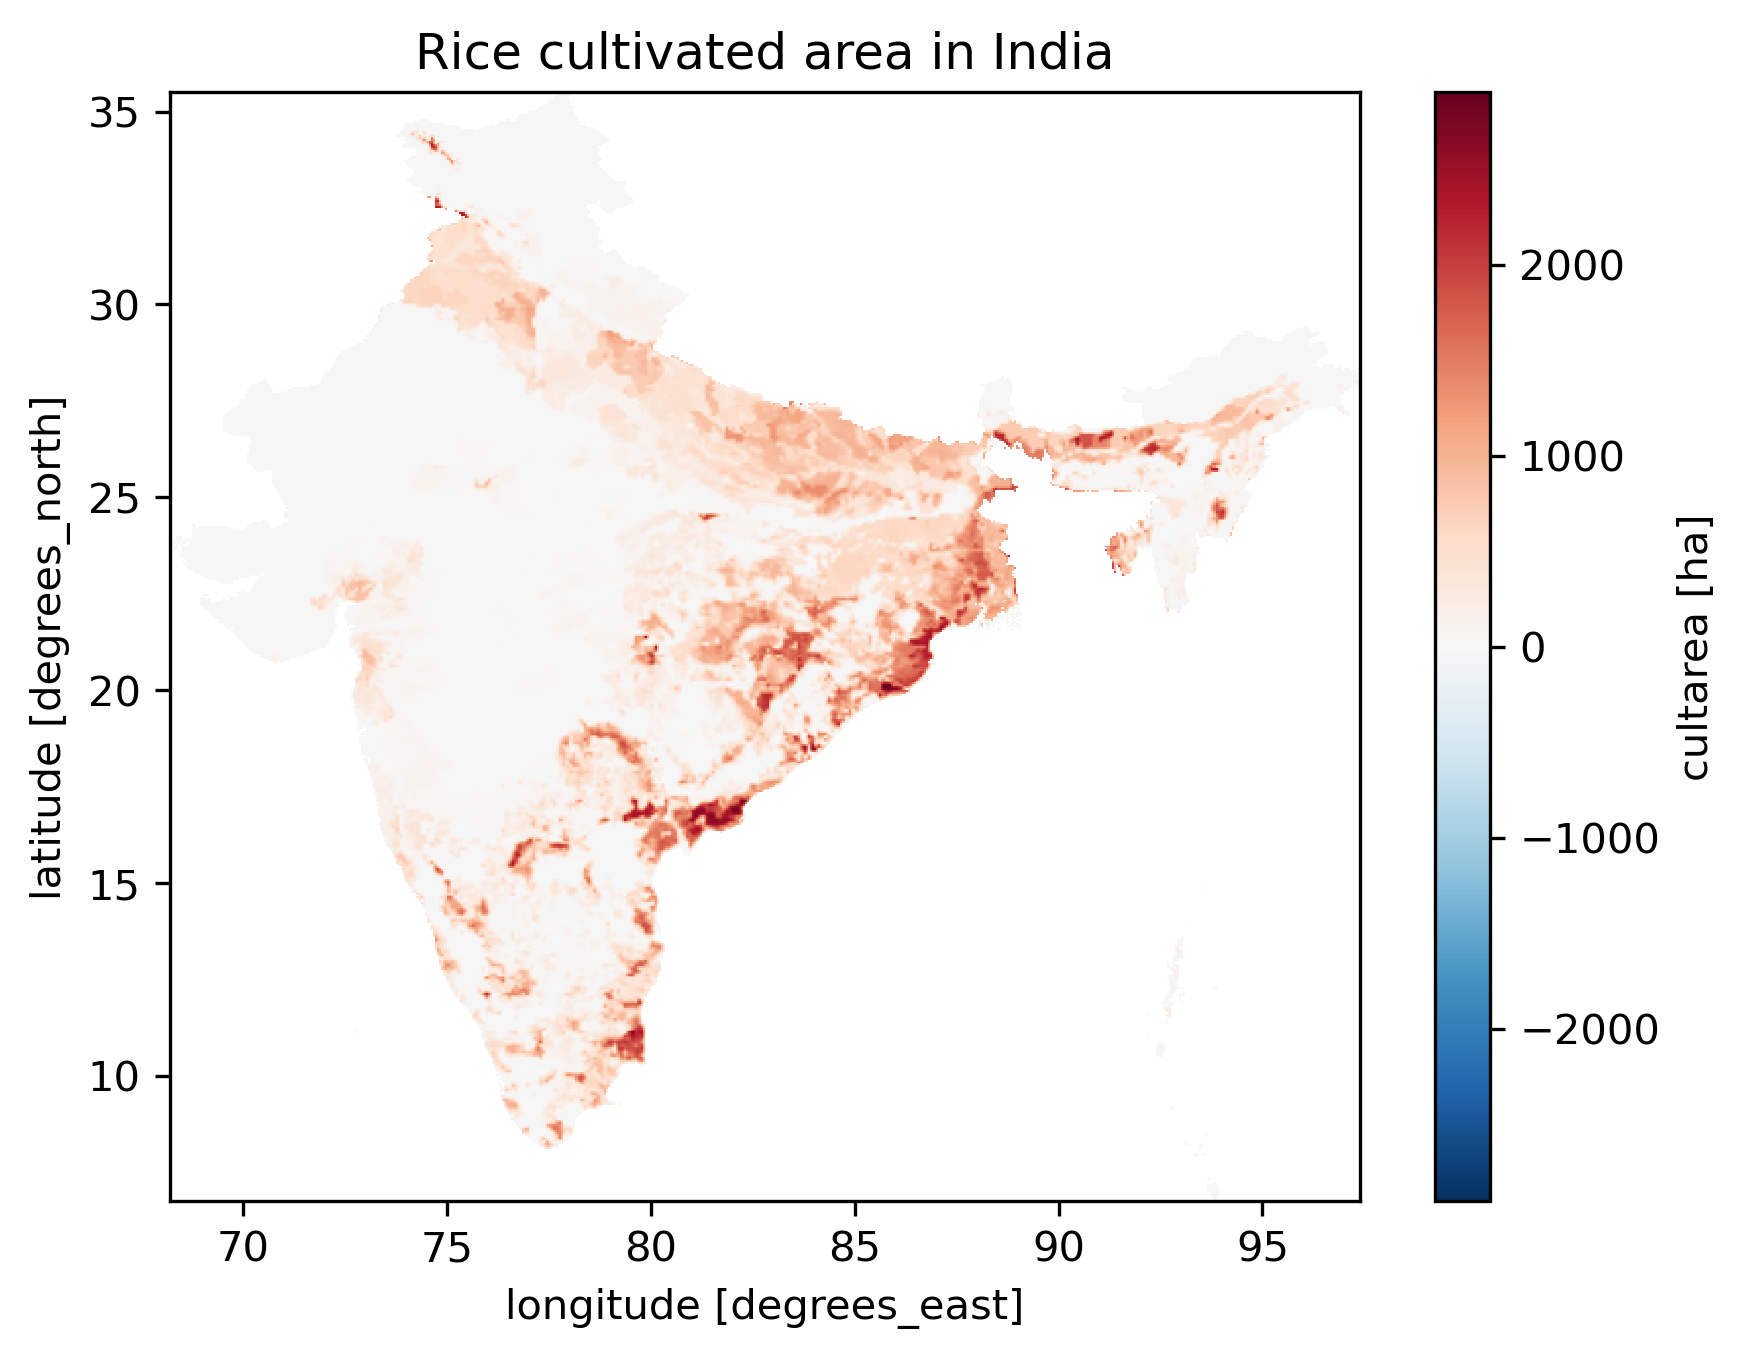

In [6]:
# Start by creating a figure and axes
fig, ax = plt.subplots()

# Clip and plot on the specified axes
cropgrids_data["cultarea"].rio.clip(india_geometry).plot(ax=ax)

# Setting the title
ax.set_title("Rice cultivated area in India")

# Show the plot
plt.show()